# Imports & Setup

In [2]:
pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ------------------------- -------------- 7.3/11.5 MB 50.2 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 40.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------  12.6/12.6 MB 61.6 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 55.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scipy

   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   ------ --------------------------------- 7.1/43.6 MB 41.1 MB/s eta 0:00:01
   ------------------ --------------------- 20.7/43.6 MB 54.4 MB/s eta 0:00:01
   ------------------------------- -------- 34.1/43.6 MB 58.2 MB/s eta 0:00:01
   ---------------------------------------  43.5/43.6 MB 55.0 MB/s eta 0:00:01
   ---------------------------------------- 43.6/43.6 MB 49.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install matplotlib

  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------------------------------- -- 7.6/8.0 MB 41.5 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 38.5 MB/s eta 0:00:00
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 39.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 50.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def lowpass_filter(data, cutoff=6, fs=100, order=2):
    """
    Applies a low-pass Butterworth filter to the input data.
    :param data: 1D array of numerical values to filter
    :param cutoff: Cutoff frequency in Hz
    :param fs: Sampling frequency in Hz
    :param order: Order of the Butterworth filter
    :return: Filtered 1D array
    """
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Batch Preprocessing Function

In [7]:
def preprocess_trc_files(input_folder, output_folder, cutoff=6, fs=100):
    """
    Finds all .trc files in input_folder, applies a low-pass filter to each marker column,
    and saves a cleaned version in output_folder.

    :param input_folder: Path to the folder containing raw .trc files
    :param output_folder: Path to the folder where cleaned .trc files will be saved
    :param cutoff: Low-pass filter cutoff frequency in Hz
    :param fs: Sampling frequency in Hz (approx. frames per second)
    """
    # Ensure output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Get all .trc files in the input_folder
    trc_files = glob.glob(os.path.join(input_folder, "*.trc"))

    for trc_file in trc_files:
        # Construct output file name
        file_name = os.path.basename(trc_file)  # e.g., "Arm_Rotations.trc"
        cleaned_name = file_name.replace(".trc", "_cleaned.trc")
        output_file = os.path.join(output_folder, cleaned_name)

        # Read the TRC file
        df = pd.read_csv(trc_file, sep='\t', skiprows=4)

        # Identify marker columns (adjust index as needed)
        marker_columns = df.columns[5:]

        # Apply filtering
        for col in marker_columns:
            df[col] = lowpass_filter(df[col].values, cutoff=cutoff, fs=fs)

        # Save cleaned data
        df.to_csv(output_file, sep='\t', index=False)
        print(f"Processed: {trc_file} -> {output_file}")


# Visualization Helper Function

In [8]:
def visualize_trc_file(raw_file, cleaned_file, marker_index=5):
    """
    Plots the raw vs. cleaned data for a single marker column (by default, index 5).
    :param raw_file: Path to the original .trc file
    :param cleaned_file: Path to the cleaned .trc file
    :param marker_index: The column index (after skipping 4 header lines) of the marker to visualize
    """
    # Load raw data
    df_raw = pd.read_csv(raw_file, sep='\t', skiprows=4)
    raw_marker_cols = df_raw.columns[5:]  # Adjust if needed
    marker_col = raw_marker_cols[marker_index]  # pick a marker
    
    raw_data = df_raw[marker_col].values

    # Load cleaned data
    df_cleaned = pd.read_csv(cleaned_file, sep='\t')
    cleaned_data = df_cleaned[marker_col].values

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(raw_data, label='Raw', alpha=0.7)
    plt.plot(cleaned_data, label='Cleaned', alpha=0.7)
    plt.legend()
    plt.title(f"{os.path.basename(raw_file)} - Marker Column: {marker_col}")
    plt.show()

# Usage

Processed: C:\Users\saisr\Documents\Research Work\OpenCap\opencap-core\Examples\Data\Latest_96df4120-f42a-4bed-9f01-242f71485dd4\MarkerData\Alt_Tricep_Extension.trc -> C:\Users\saisr\Documents\Research Work\OpenCap\opencap-core\Examples\Data\Latest_96df4120-f42a-4bed-9f01-242f71485dd4\MarkerData\Processed\Alt_Tricep_Extension_cleaned.trc
Processed: C:\Users\saisr\Documents\Research Work\OpenCap\opencap-core\Examples\Data\Latest_96df4120-f42a-4bed-9f01-242f71485dd4\MarkerData\Arms_up_down.trc -> C:\Users\saisr\Documents\Research Work\OpenCap\opencap-core\Examples\Data\Latest_96df4120-f42a-4bed-9f01-242f71485dd4\MarkerData\Processed\Arms_up_down_cleaned.trc
Processed: C:\Users\saisr\Documents\Research Work\OpenCap\opencap-core\Examples\Data\Latest_96df4120-f42a-4bed-9f01-242f71485dd4\MarkerData\Arms_up_down_1.trc -> C:\Users\saisr\Documents\Research Work\OpenCap\opencap-core\Examples\Data\Latest_96df4120-f42a-4bed-9f01-242f71485dd4\MarkerData\Processed\Arms_up_down_1_cleaned.trc
Processe

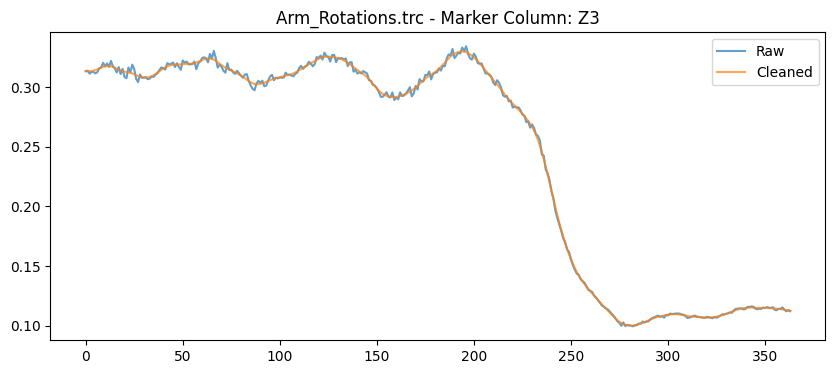

In [ ]:
# Paths to the data
INPUT_FOLDER = r"C:\Users\saisr\Documents\Research Work\OpenCap\opencap-core\Examples\Data\Latest_96df4120-f42a-4bed-9f01-242f71485dd4\MarkerData"   
OUTPUT_FOLDER = r"C:\Users\saisr\Documents\Research Work\OpenCap\opencap-core\Examples\Data\Latest_96df4120-f42a-4bed-9f01-242f71485dd4\MarkerData\Processed"

# 1. Batch preprocess all .trc files
preprocess_trc_files(INPUT_FOLDER, OUTPUT_FOLDER, cutoff=6, fs=100)

# 2. Visualize one example
raw_example = os.path.join(INPUT_FOLDER, "Arm_Rotations.trc")
cleaned_example = os.path.join(OUTPUT_FOLDER, "Arm_Rotations_cleaned.trc")

visualize_trc_file(raw_example, cleaned_example, marker_index=5)


# Custom Visualization

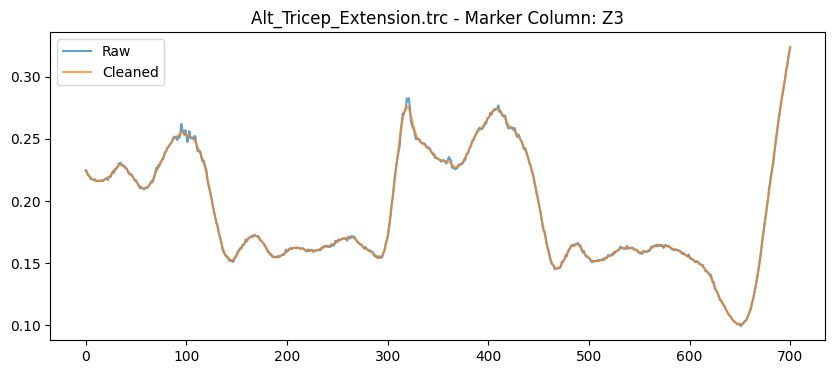

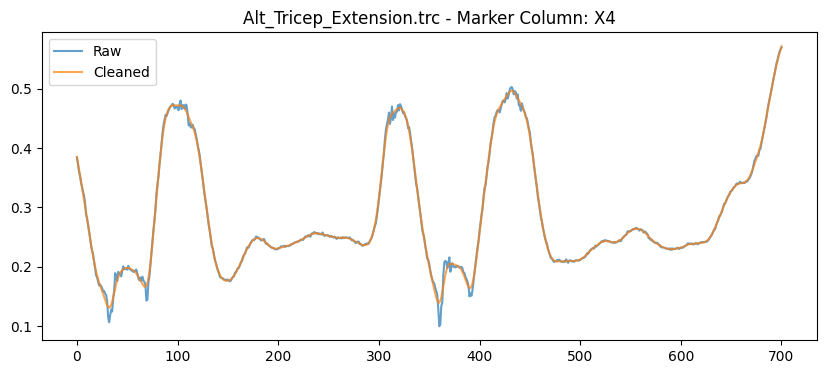

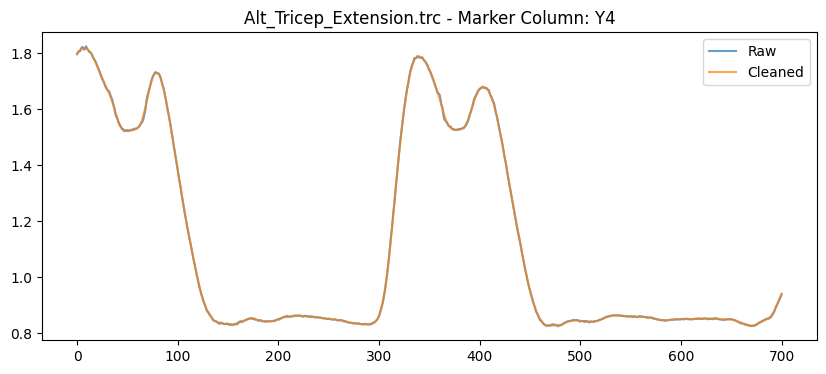

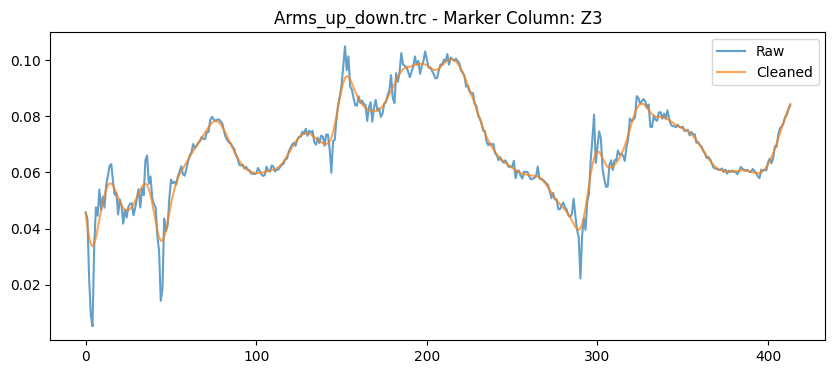

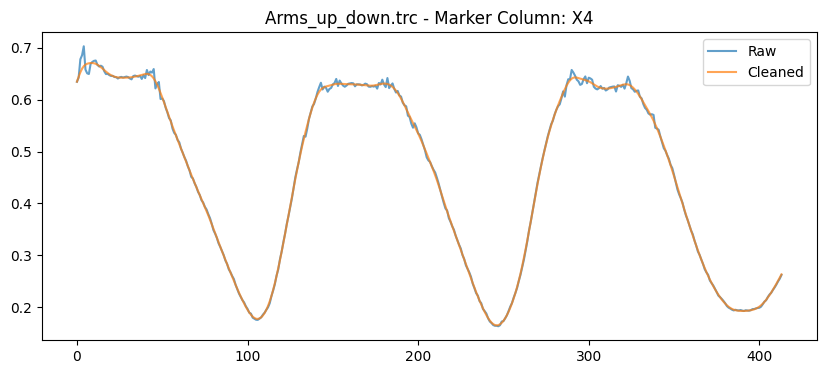

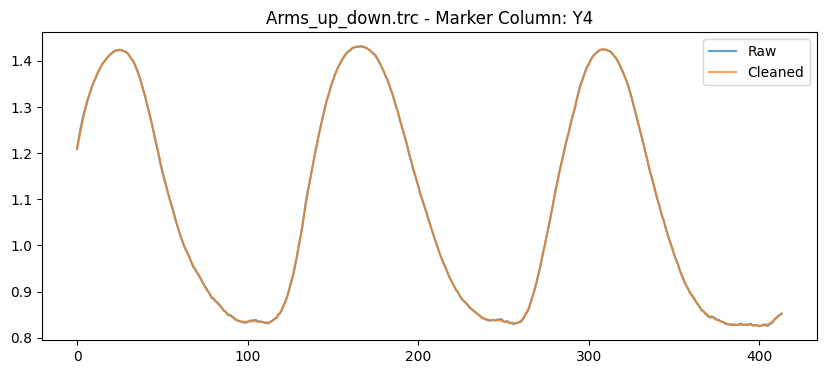

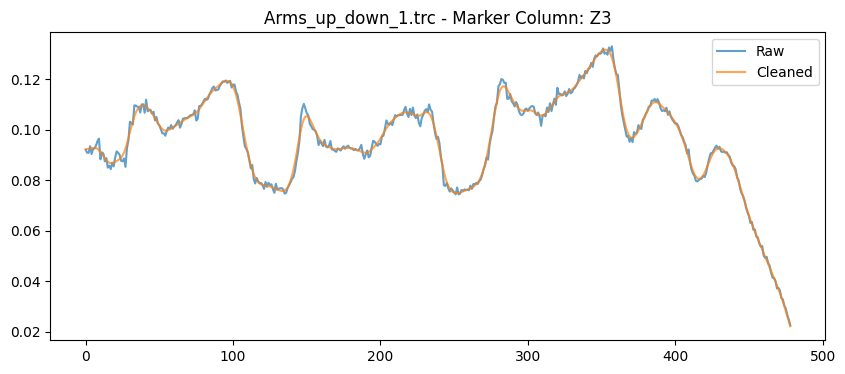

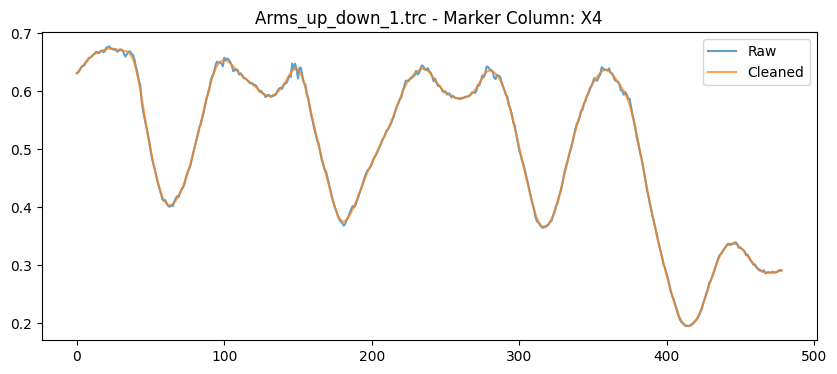

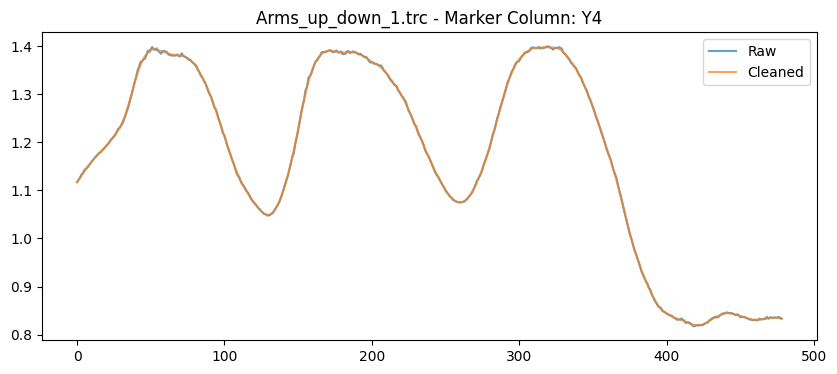

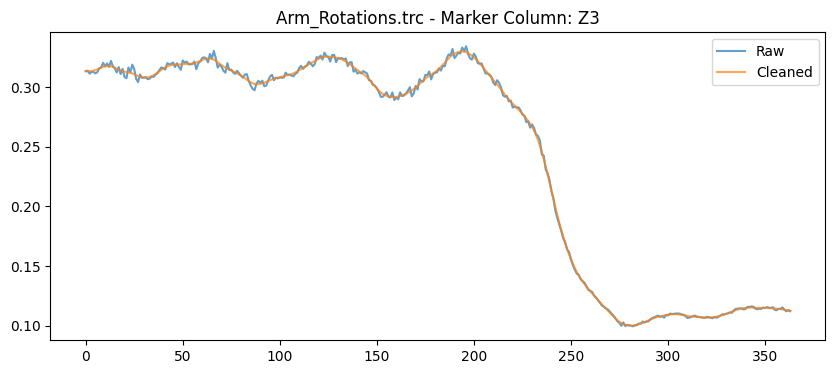

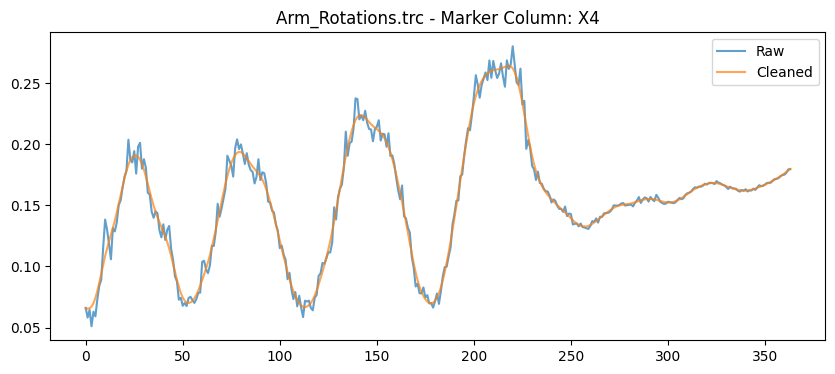

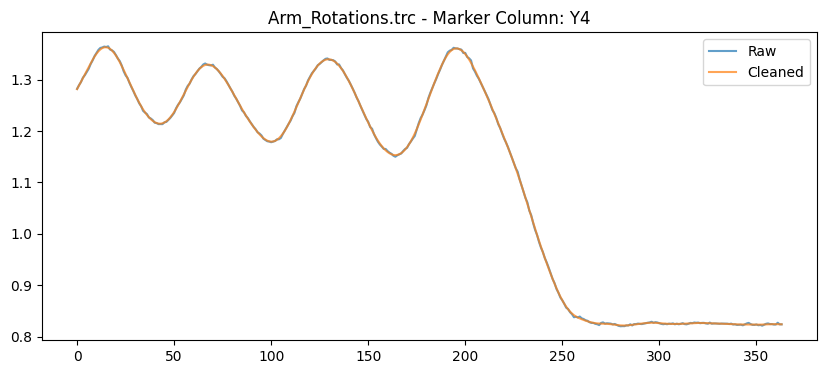

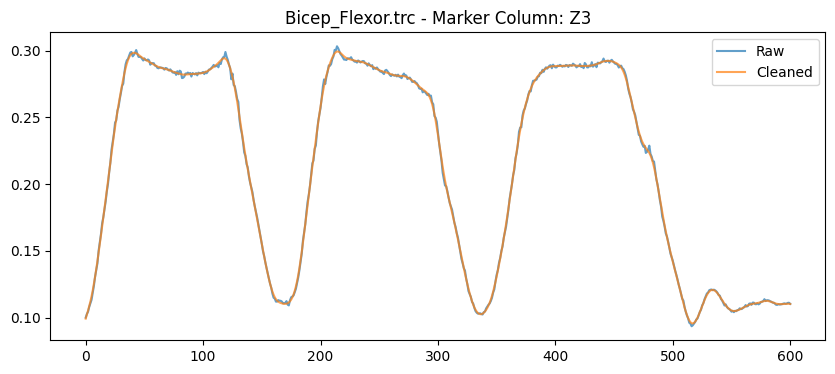

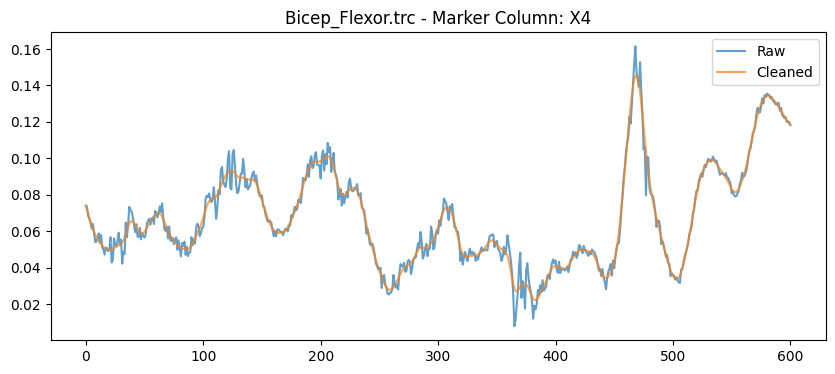

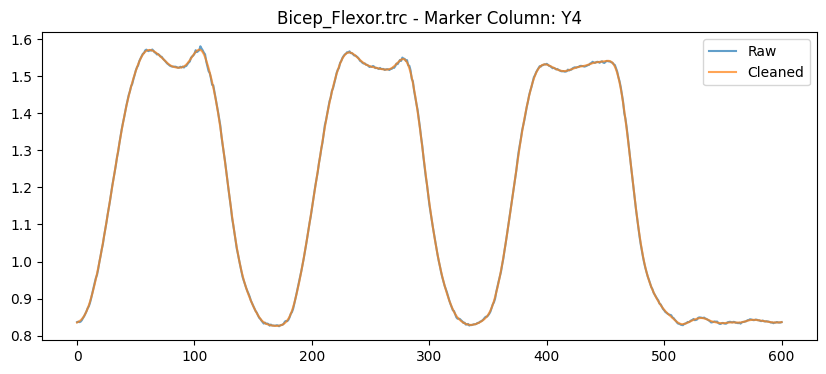

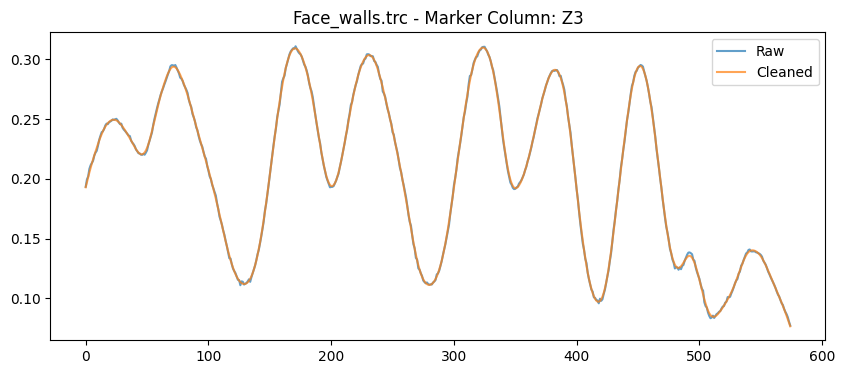

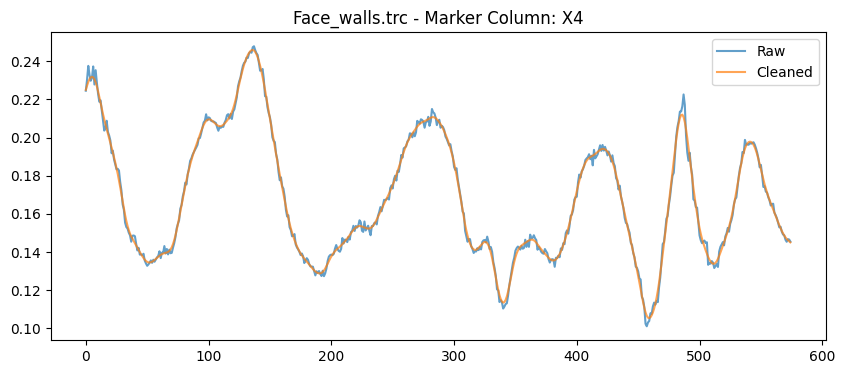

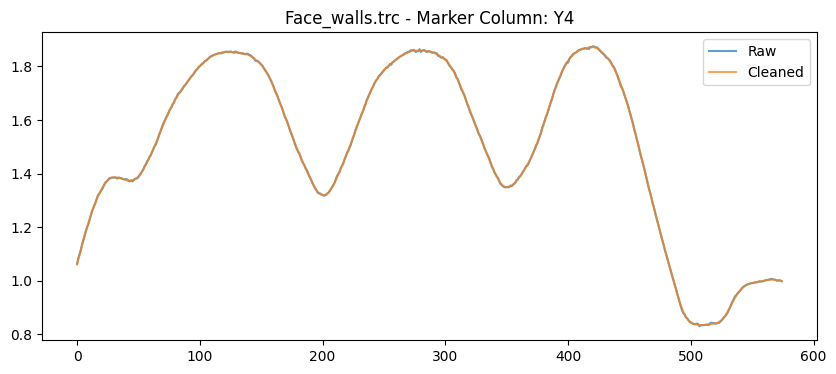

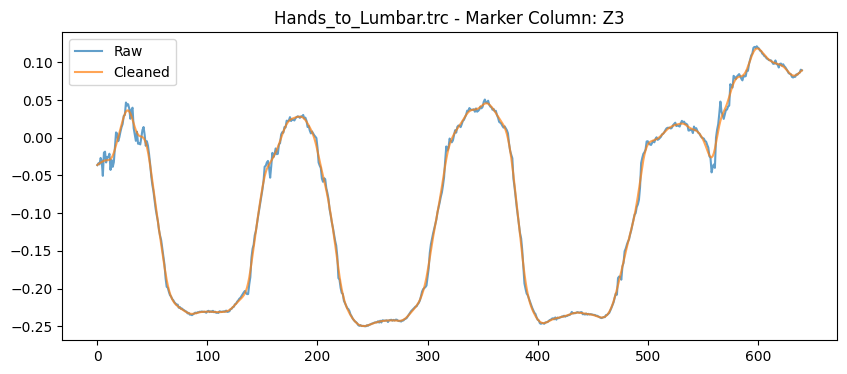

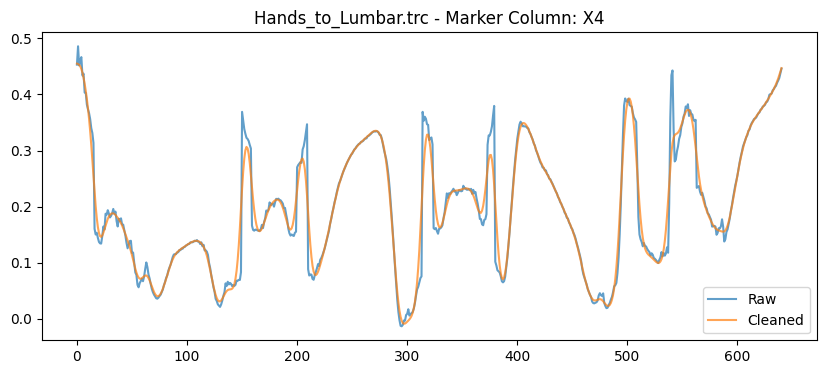

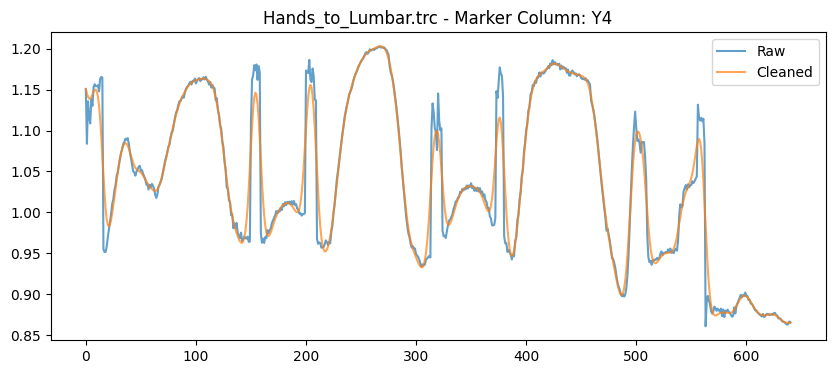

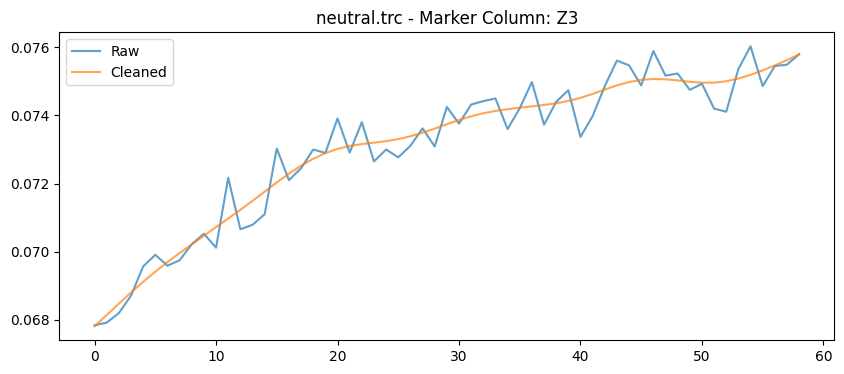

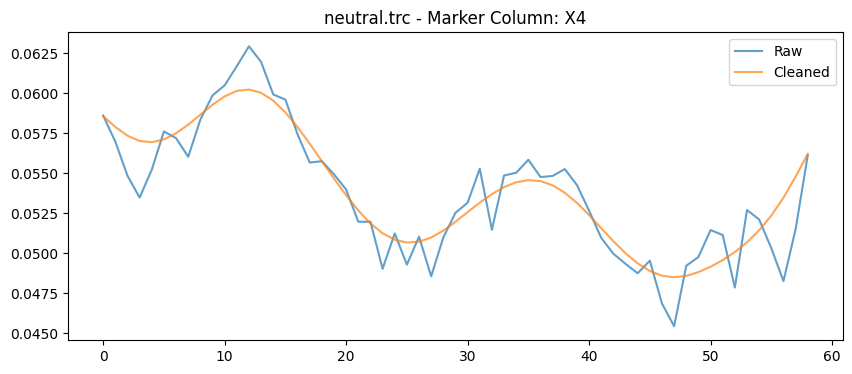

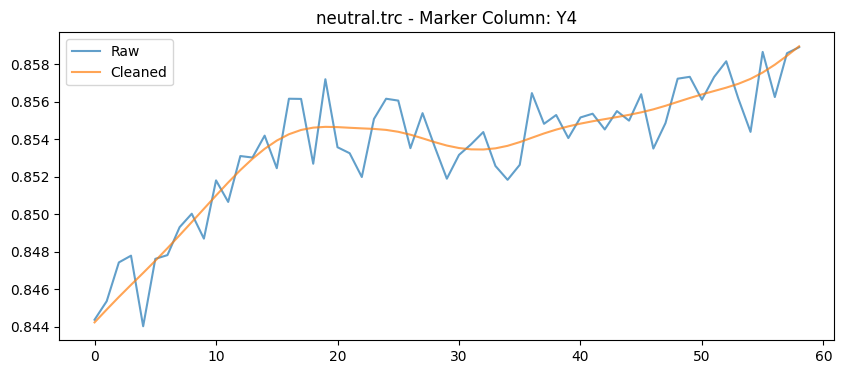

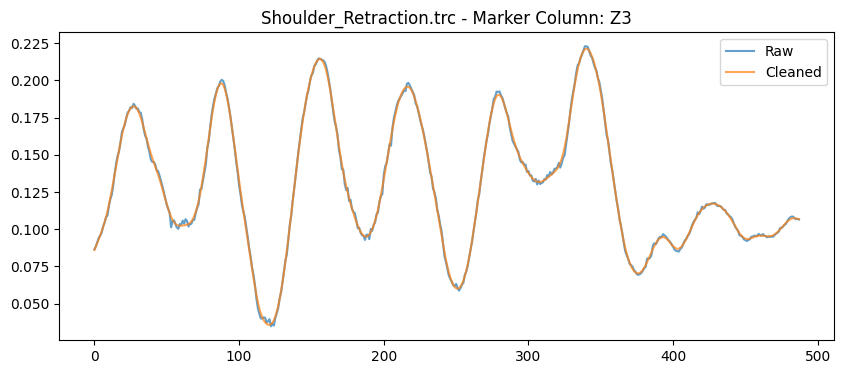

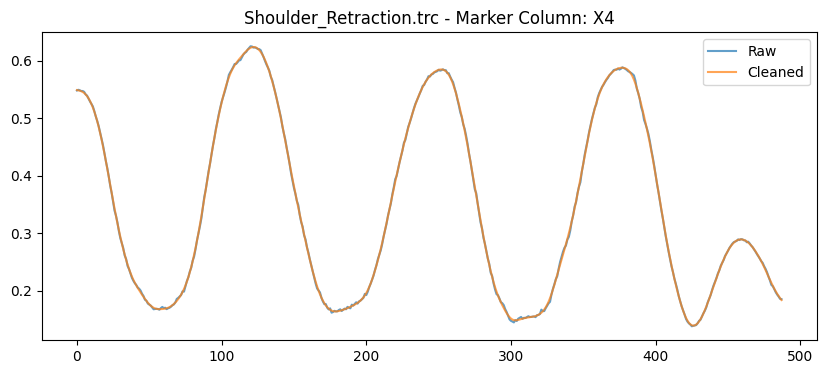

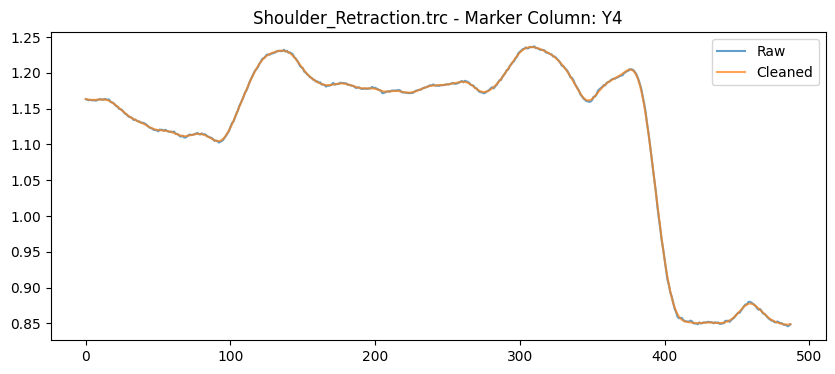

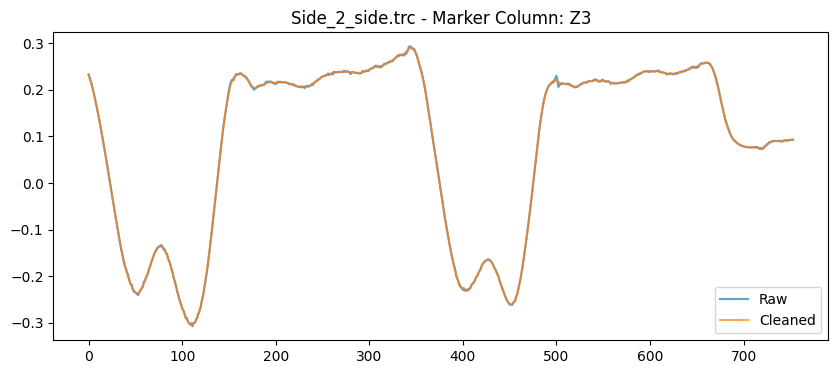

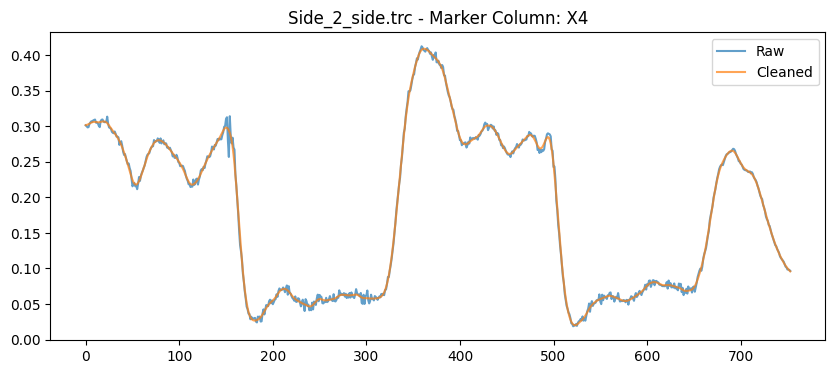

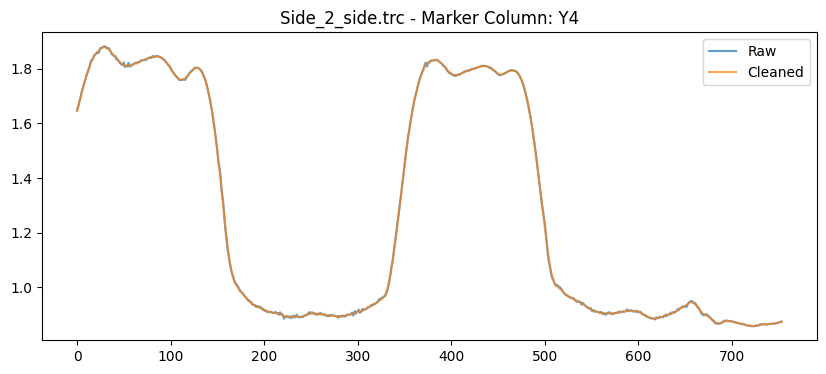

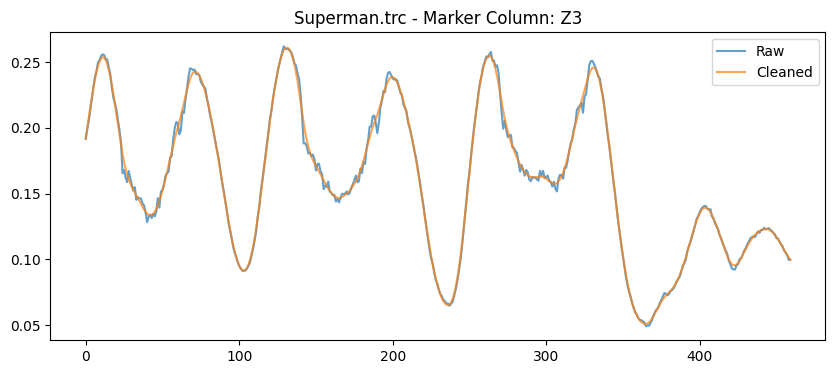

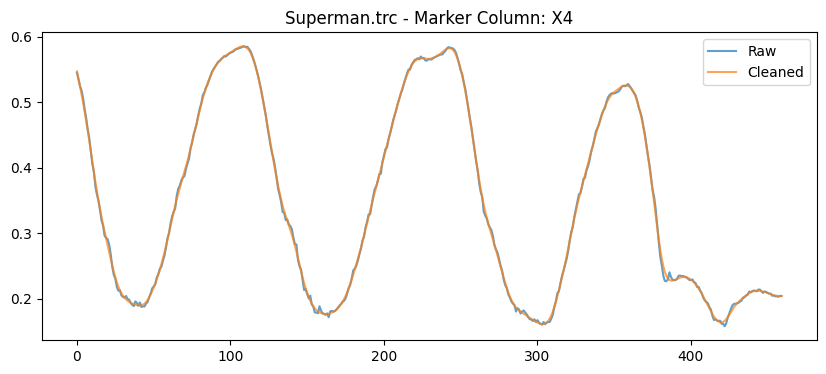

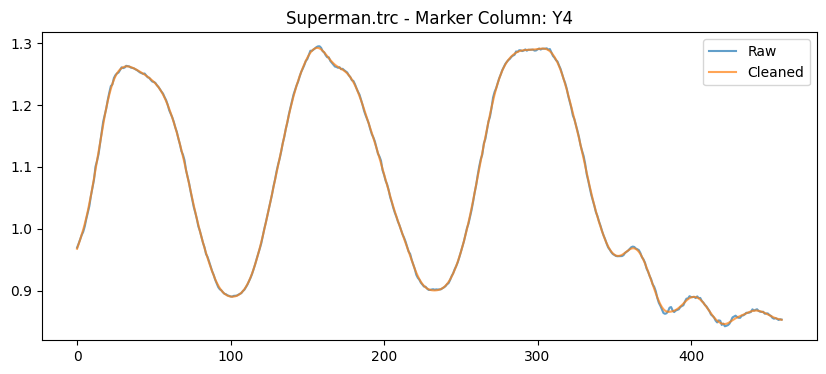

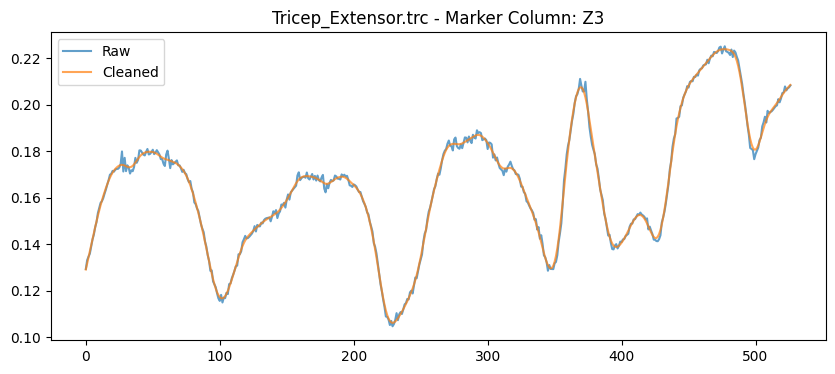

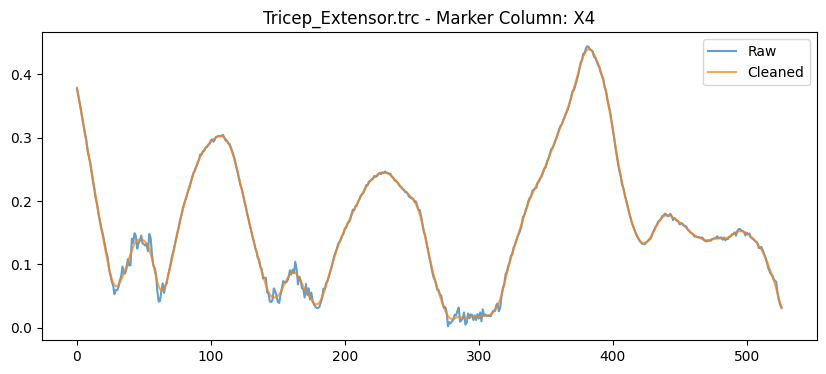

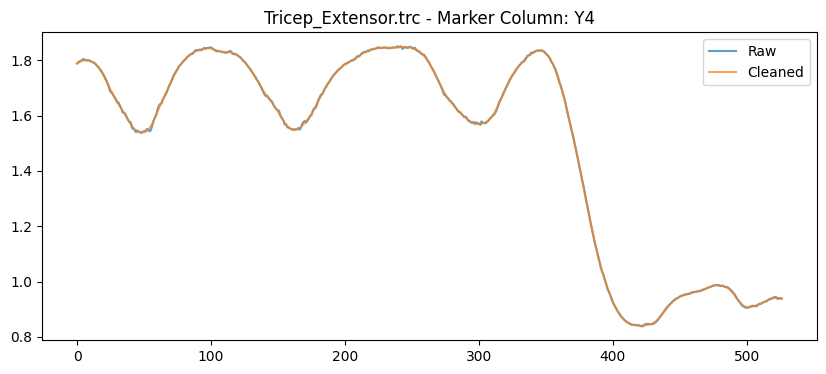

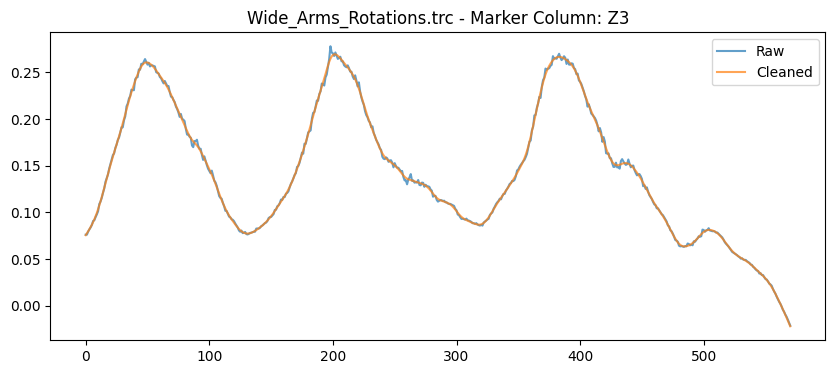

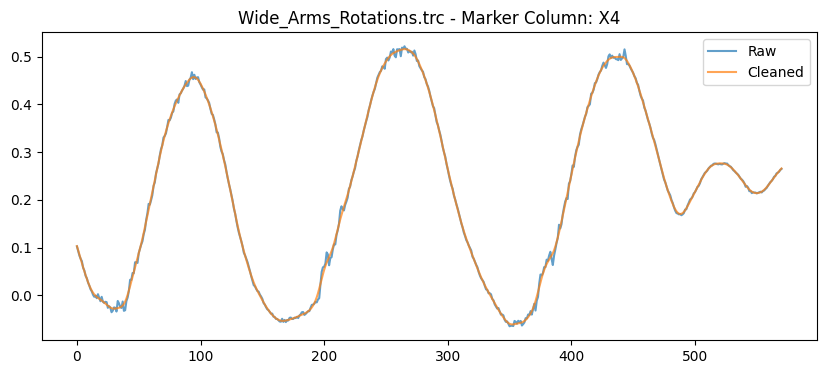

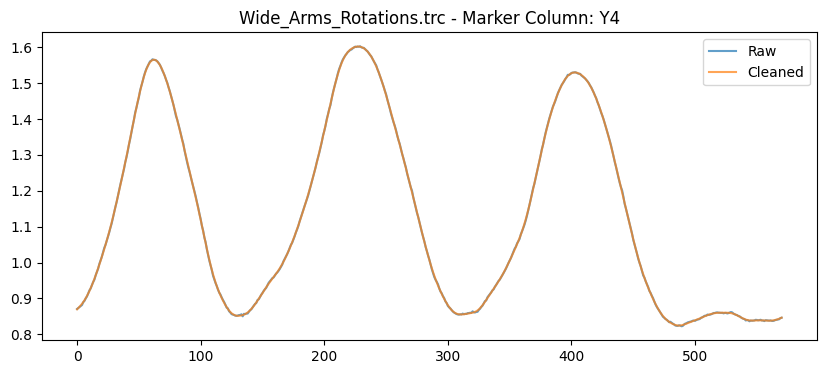

In [10]:
# Example: Visualize first 3 markers for each processed file
for trc_file in glob.glob(os.path.join(INPUT_FOLDER, "*.trc")):
    file_name = os.path.basename(trc_file)
    cleaned_name = file_name.replace(".trc", "_cleaned.trc")
    cleaned_file = os.path.join(OUTPUT_FOLDER, cleaned_name)

    # For each file, visualize marker_index 5, 6, and 7 for example
    for marker_idx in [5, 6, 7]:
        visualize_trc_file(trc_file, cleaned_file, marker_index=marker_idx)


**Visualization Explanation:**

The graph above compares two curves for a single marker column:
- The **Raw Data** curve shows the original marker trajectory, which includes high-frequency noise (jitter) inherent to motion capture.
- The **Cleaned Data** curve shows the same trajectory after applying a low-pass Butterworth filter. This filtering smooths out the noise, revealing the underlying movement trend more clearly.

This side-by-side comparison helps verify that the preprocessing step effectively reduces noise while retaining the essential motion information, making the data ready for further analysis (e.g., inverse kinematics).